In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import h5py
import astropy.constants as const

In [36]:
def read_hdf5_file_raw(file_path):
    with h5py.File(file_path, 'r') as f:
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s']) * u.cm/u.s
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T']) * u.K
        rho0 = np.array(f['/rho']) * u.g/(u.cm**3)
        p0 = np.array(f['/p']) * u.dyn/(u.cm**2)
        
        r_over_R = np.flip(r_over_R)
        c_s = np.flip(c_s)
        Gamma_1 = np.flip(Gamma_1)
        T0 = np.flip(T0)
        rho0 = np.flip(rho0)
        p0 = np.flip(p0)

    return r_over_R, c_s, Gamma_1, T0, rho0, p0

r_over_R, c_s, Gamma_1, T0, rho0, p0 =\
    read_hdf5_file_raw("../../additional_files/solar_s.h5")

In terms of the unitless variable $r'=r/R_*$, which we will just call $r$ in the following, we have that the infidesimal volume of a shell is 

$$
dV = 4\pi R_*^3 r^2 dr
$$

and then get that the mass
$$
M(r) = \int_0^r dm = \int_0^r \rho(r) dV = 4\pi R_*^3 \int_0^r \rho(r) r^2 dr
$$

This gives us the gravitational acceleration (Newton)

$$
g(r) = \frac{GM(r)}{r^2 R_*^2} = \frac{4\pi R_* G}{r^2}\int_0^r \rho(r) r^2 dr.
$$

Calling $\rho(r) r^2=f(r)$

$$
g(r_{i+1})=\frac{4\pi R_* G}{r_{i+1}^2}\frac{1}{2}(\rho_{i+1} r_{i+1}^2-\rho_i r_i^2)(r_{i+1}-r_{i})
$$



We approximate the integral with a Riemann sum

$$
g(r_{j}) = \frac{4\pi R_* G}{r_j^2}\sum _{i=0}^j \rho_i r_i^2 (r_{i}-r_{i-1})
$$

In [37]:
R_sun = 6.957e10 * u.cm
M_sun = 1.989e33 * u.gram
G = 6.6743e-8 * u.cm**3 /(u.gram * u.s * u.s)

nz = len(r_over_R)

In [101]:
g = np.zeros(nz) * u.cm / (u.s**2)
# we let g[0] = 0, M(r=0)=0

for i in range(0, nz-1):
    dr = r_over_R[i+1] - r_over_R[i]
    if (i==1):   
        print(r_over_R[i+1]**(-2) * R_sun*G)
        print(R_sun * G /(r_over_R[i+1]**2), (rho0[i+1]*r_over_R[i+1]-rho0[i]*r_over_R[i]))
    g[i+1] = 4 * np.pi * R_sun * G /(r_over_R[i+1]**2) *0.5*(rho0[i+1]*r_over_R[i+1]-rho0[i]*r_over_R[i])*dr

2336214497.0211463 cm4 / (g s2)
2336214497.0211463 cm4 / (g s2) 0.0028765143950000016 g / cm3


In [66]:
g_old = g.copy()

In [95]:
g[1]

<Quantity 4488977.87385554 cm / s2>

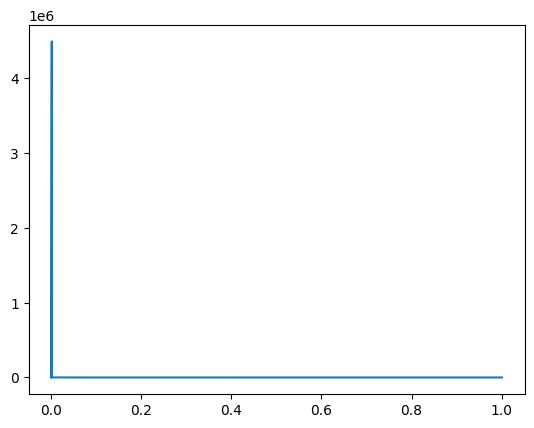

In [93]:
plt.plot(r_over_R, g)

Text(0, 0.5, 'Gravitational acceleration [cm/s$^2$]')

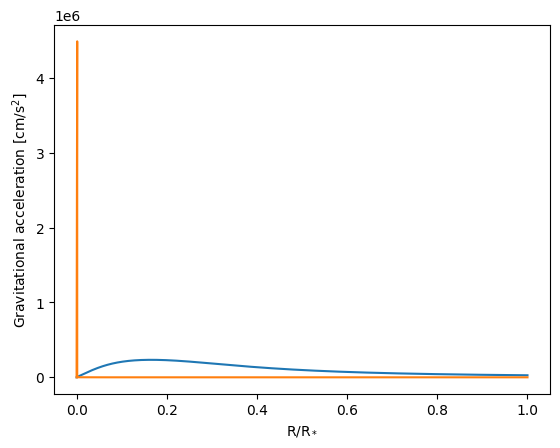

In [79]:
plt.plot(r_over_R, g_old)
plt.plot(r_over_R, g)
plt.xlabel("R/R$_*$")
plt.ylabel("Gravitational acceleration [cm/s$^2$]")

# Difference between actual surface value and calculated surface value:

In [62]:
np.where(np.abs(r_over_R-1)<1e-6)

(array([2401]),)

In [73]:
g_sun = G * M_sun / (R_sun**2)
np.abs(g_sun - g[2401])

<Quantity 17.77086777 cm / s2>

In [63]:
print("g_sun:{}".format(g_sun))
print("g[-1]:{}".format(g[2401]))

g_sun:27428.149001043374 cm / s2
g[-1]:27377.682505181543 cm / s2
